In [1]:
import pandas as pd
import numpy as np


In [8]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
df = df.iloc[:,2:]

In [10]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [11]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

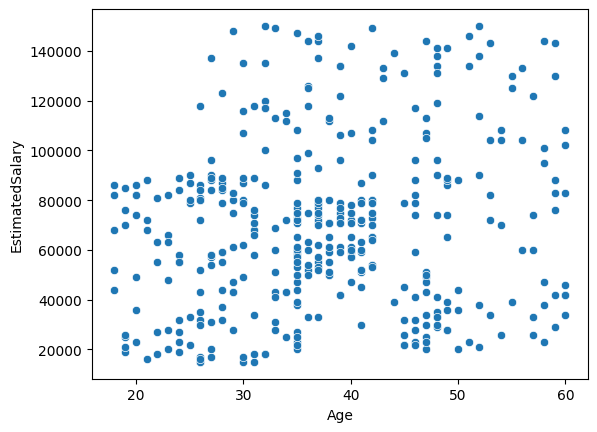

In [13]:
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])

In [14]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
y_train

,Purchased
205,0
354,1
3,0
264,1
194,0
...,...
299,1
22,1
72,0
15,0


In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.6488 - loss: 999.6484 - val_accuracy: 0.4000 - val_loss: 834.6777
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4392 - loss: 542.1828 - val_accuracy: 0.6000 - val_loss: 365.4957
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5777 - loss: 227.5932 - val_accuracy: 0.6000 - val_loss: 259.9793
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6394 - loss: 219.7209 - val_accuracy: 0.4000 - val_loss: 103.9622
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4660 - loss: 75.7333 - val_accuracy: 0.6000 - val_loss: 70.3158
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4744 - loss: 38.0965 - val_accuracy: 0.4000 - val_loss: 39.4316
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4466 - loss: 46.8174 - val_accuracy: 0.6000 - val_loss: 86.3426
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4931 - loss: 88.

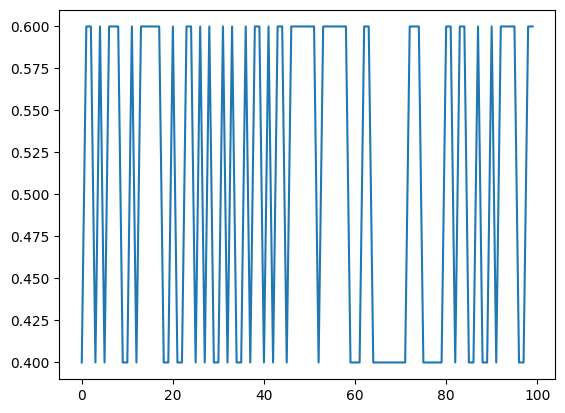

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

Now applying Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: >

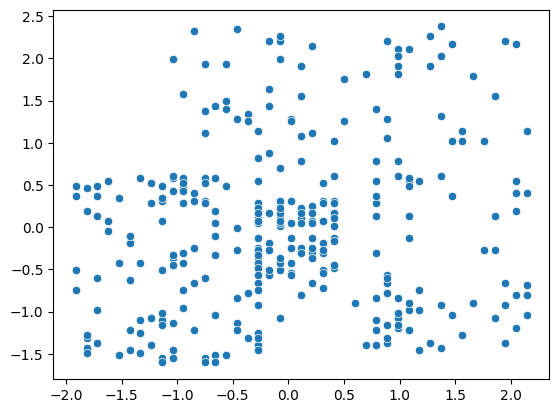

In [34]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [35]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
history = model.fit(X_train_scaled, y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7014 - loss: 0.6417 - val_accuracy: 0.8250 - val_loss: 0.5952
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8117 - loss: 0.5951 - val_accuracy: 0.8125 - val_loss: 0.5457
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8358 - loss: 0.5472 - val_accuracy: 0.8250 - val_loss: 0.5025
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8402 - loss: 0.5014 - val_accuracy: 0.8125 - val_loss: 0.4660
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8694 - loss: 0.4608 - val_accuracy: 0.8125 - val_loss: 0.4356
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8510 - loss: 0.4510 - val_accuracy: 0.8250 - val_loss: 0.4108
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8768 - loss: 0.4065 - val_accuracy: 0.8250 - val_loss: 0.3887
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8440 - loss: 0.4125 - val_accuracy: 0.

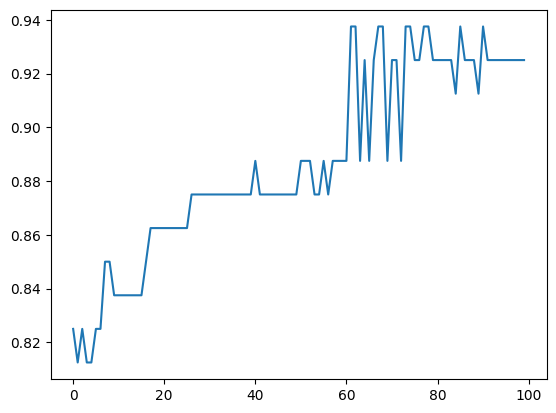

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])